In [68]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install factor_analyzer

%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [69]:
# Load data
recipes = pd.read_json("recipes.json").T

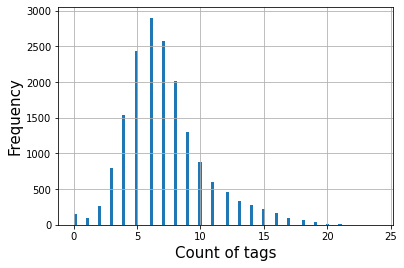

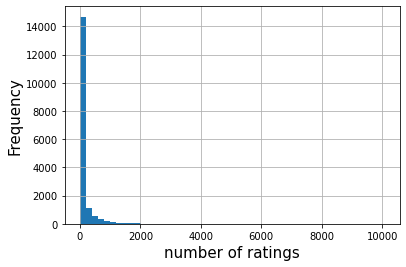

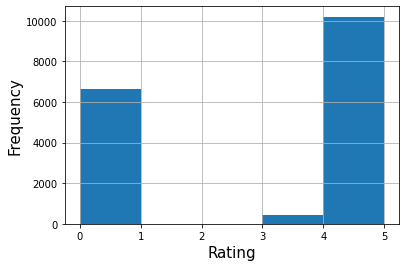

In [70]:
# Calculate Count of tags
recipes['len'] = recipes['tags'].str.len()

# create histogram of len
recipes['len'].hist(bins=100)
plt.xlabel("Count of tags", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# create histogram of num_ratings
recipes['num_ratings'].hist(bins=50)
plt.xlabel("number of ratings", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# create histogram of avg_raging
recipes['avg_rating'].hist(bins=5)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()


# Testing Dimensionality Reduction Techniques
https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [91]:
#Loading data using Austen's code
import json

# Load the data
with open("recipes.json", "r") as file:
    recipes = file.read()
with open("ingredients.json", "r") as file:
    ingredients = file.read()
with open("tags.json", "r") as file:
    tags = file.read()

recipes = json.loads(recipes)
ingredients = json.loads(ingredients)
tags = json.loads(tags)

print("number of recipes: " + str(len(recipes)))

# Create a mapping to make the one hot encoding of ingredients with
ingredients_indices = {}
index = 0
for ingredient in ingredients.items():
    ingredients_indices[ingredient[0]] = index
    index += 1

# Calculate the dimension of the training and testing data
num_samples = 5000
num_features = len(ingredients)

samples = np.zeros((num_samples, num_features))

# Create the training and testing data
sample_index = 0
for recipe in recipes.items():
    if sample_index == 19:
        print(recipe)
    if sample_index == 5000:
        break
    tag_index = 0
    for ingredient in recipe[1]["ingredients"]:
        samples[sample_index][ingredients_indices[str(ingredient["id"])]] = 1.0
    sample_index += 1

number of recipes: 17268
('17285', {'title': 'Kitchen Sink Cookies', 'yields': 'About 18 large cookies', 'steps': ["Make the toffee, if you'd like: Line a cookie sheet with parchment paper or a nonstick baking mat.", 'In a small saucepan, combine butter, sugar and salt. Bring to a boil over medium heat and let bubble, whisking occasionally, until light golden brown, 5 to 7 minutes.', 'Turn off heat and, if using, stir in nuts or seeds. Pour onto the prepared pan and let the mixture run toward the edges. If necessary, use a rubber spatula to spread mixture; it should not be more than 1/4-inch thick. Set aside to harden completely. (If weather is very hot and humid, chill in refrigerator.) Break or chop into small (about 1/2-inch) chunks.', 'Make the cookies: In a bowl, whisk dry ingredients together. In a stand mixer fitted with the paddle attachment, cream butter and sugars together at medium speed until fluffy and smooth, about 2 minutes. Mix in egg, then vanilla. In three batches, ad

5000
(5000, 2419)
(5000, 2)


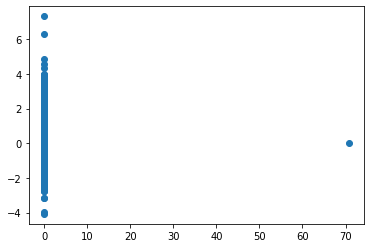

In [83]:
print(len(samples))
print(samples.shape)

transformer = FactorAnalysis(n_components=2, random_state=0)
transformed_samples = transformer.fit_transform(samples)

print(transformed_samples.shape)

plt.scatter(transformed_samples[:,0], transformed_samples[:,1])
plt.show()

In [92]:
print("test")

test
